## TimeAge Data_Handling

In [1]:
import pandas as pd 
import random as randn
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
import seaborn as sns
from matplotlib import font_manager, rc

In [2]:
# 한글 폰트 사용
def font_refresh():
    font_location = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=font_location).get_name()
    rc('font', family=font_name)

### Def) 고유값 부여하기

In [3]:
def randn_generater(dataframe_length):
    key_list = []
    ran_num =  randn.random()
    for i in range(dataframe_length):
        while ran_num in key_list:
            ran_num =  randn.random()
        key_list.append(ran_num)
    return(key_list)

### Data Filtering: Drop('time' column)

In [4]:
data = pd.read_csv("TimeAge.csv")

# time 열의 값 종류 오로지 0 => 무의미하기 때문에, 제거 
generation_range = data.age.unique()
print("time열의 값 종류:",data.time.unique()) 
data = data.drop(['time'],1)
data.columns

time열의 값 종류: [0]


Index(['date', 'age', 'confirmed', 'deceased'], dtype='object')

### 1. age Cohort

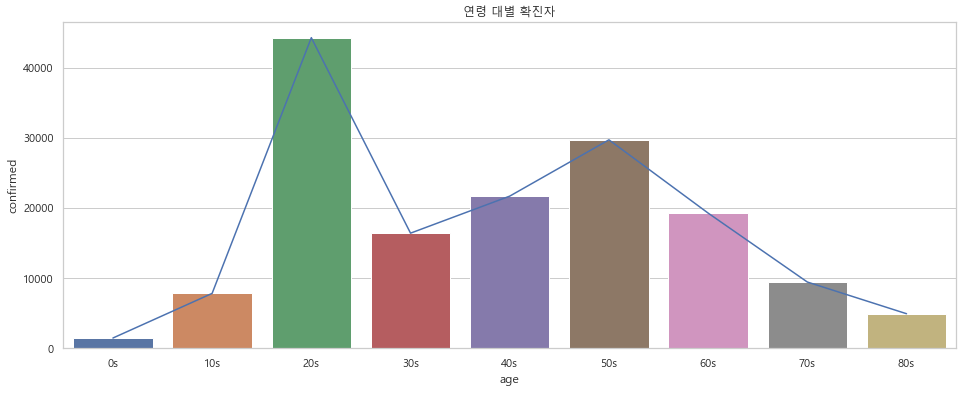

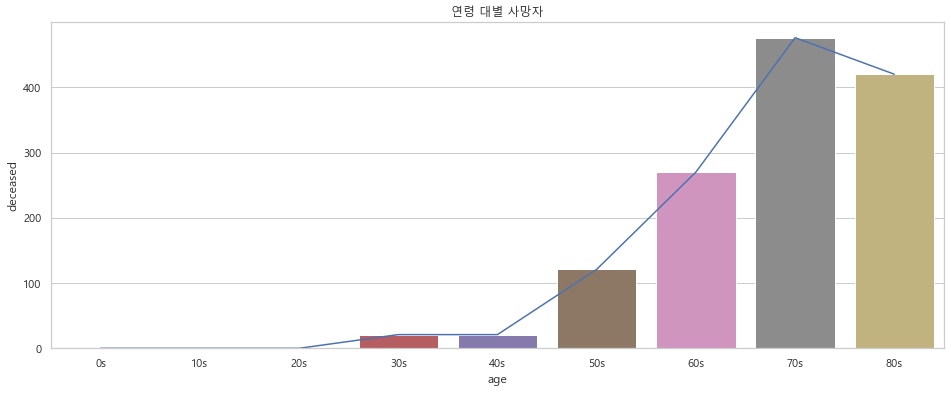

str

In [8]:
# set 명령으로 색상, 틱 스타일 등 전반적인 플롯 스타일을 Seaborn 기본 스타일로 바꾼다. 
# set_style 명령은 틱 스타일만 바꿀 수 있다. darkgrid, whitegrid, dark, white, 그리고 ticks 스타일을 제공

sns.set(style="whitegrid") 

data = pd.read_csv("TimeAge.csv")
font_refresh()
age_Cohort = data.groupby('age').sum()

plt.figure(figsize = (16,6))
age_Cohort = age_Cohort.reset_index()
plt.plot(age_Cohort['confirmed'],'b-')
sns.barplot(x="age", y="confirmed", data=age_Cohort)
plt.title("연령 대별 확진자")
plt.show()

plt.figure(figsize = (16,6))
font_refresh()
plt.plot(age_Cohort['deceased'],'-b')
sns.barplot(x="age", y="deceased", data=age_Cohort)
plt.title("연령 대별 사망자")
plt.show()
#type(age_Cohort['age'][0])

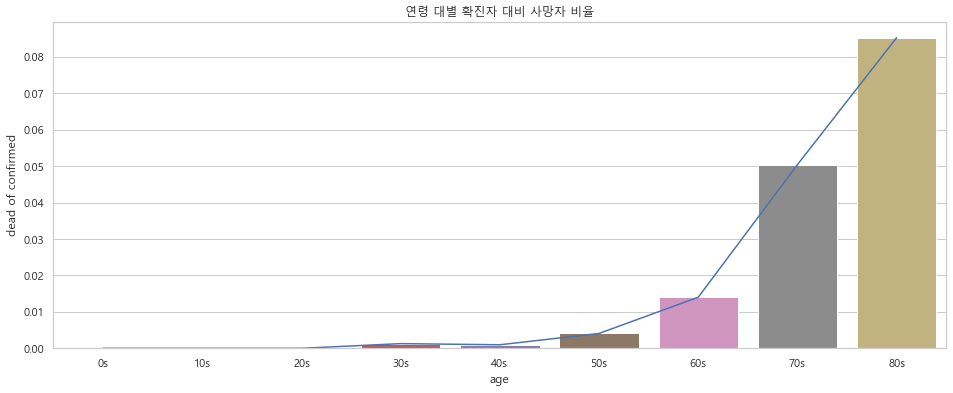

In [577]:
age_Cohort['dead of confirmed'] = age_Cohort['deceased']/ age_Cohort['confirmed']

font_refresh()
plt.figure(figsize = (16,6))
plt.plot(age_Cohort['dead of confirmed'],'-b')
sns.barplot(x="age", y="dead of confirmed", data=age_Cohort)
plt.title("연령 대별 확진자 대비 사망자 비율")
plt.show()

In [564]:
age_Cohort

,age,time,confirmed,deceased,dead of confirmed
0,0s,0,1464,0,0.000000
1,10s,0,7824,0,0.000000
2,20s,0,44250,0,0.000000
3,30s,0,16402,21,0.001280
4,40s,0,21677,21,0.000969
5,50s,0,29696,121,0.004075
6,60s,0,19261,270,0.014018
7,70s,0,9441,476,0.050418
8,80s,0,4926,420,0.085262


In [565]:
num = 0 
for i in range(9):
    if i !=0:
        i = i*10
        
    temp_name = str(i)+'s'
    temp = 100 * age_Cohort[age_Cohort['age']== temp_name]['dead of confirmed'][num]
    num+=1
    print("'전체 환자 중",temp_name, "환진자 중 사망률은",round(temp,2),"%입니다" )

'전체 환자 중 0s 환진자 중 사망률은 0.0 %입니다
'전체 환자 중 10s 환진자 중 사망률은 0.0 %입니다
'전체 환자 중 20s 환진자 중 사망률은 0.0 %입니다
'전체 환자 중 30s 환진자 중 사망률은 0.13 %입니다
'전체 환자 중 40s 환진자 중 사망률은 0.1 %입니다
'전체 환자 중 50s 환진자 중 사망률은 0.41 %입니다
'전체 환자 중 60s 환진자 중 사망률은 1.4 %입니다
'전체 환자 중 70s 환진자 중 사망률은 5.04 %입니다
'전체 환자 중 80s 환진자 중 사망률은 8.53 %입니다


### 2. 날짜별 연령대 확진자, 

In [581]:
dateAge_Cohort = data.groupby(['date','age']).sum()
dateAge_Cohort = dateAge_Cohort.reset_index()
date_list = data.date.unique()

### 2-1. 날짜별 확진자가 가장 많은 연령대

In [582]:
dateAge_Cohort['key'] =  randn_generater(len(dateAge_Cohort))
check_list = []
for i in date_list:
    temp_data = dateAge_Cohort[dateAge_Cohort['date'] == i]
    temp_data = temp_data.reset_index()
    for num in temp_data['key']:
        temp_ing = temp_data[temp_data['key'] == num]
        if temp_ing['confirmed'].values[0] == temp_data['confirmed'].max():
            check_list.append(num)

In [583]:
temp = dateAge_Cohort.loc[dateAge_Cohort['key'].isin(check_list)]
maxConfirm_ageDate = temp.drop('key',1)
maxConfirm_ageDate = maxConfirm_ageDate.set_index('date')
print("날짜별 확진자 최대 연령대 오직:",maxConfirm_ageDate['age'].unique())

날짜별 확진자 최대 연령대 오직: ['20s']


### 2-2 요일별 확진자 

In [570]:
day_data = pd.read_csv("TimeAge.csv")

dict_date = {}
date_index = day_data.date.unique()
dayOfTheWeek = ["MON", "TUE", "WED", "THU", "FRU", "SAT", "SUN"]

for i in range(len(date_index)):
    date_time = datetime.datetime.strptime(date_index[i],'%Y-%m-%d')
    DayWeek = dayOfTheWeek[date_time.weekday()]
    dict_date[date_time] = DayWeek

In [571]:
    day_data['date'] = pd.to_datetime(day_data['date'])

    day_list = []
    for i in range(len(day_data.date)):
        day_list.append(dict_date[day_data.date[i]])
    day_data['dayOfTheWeek'] = day_list

In [1]:
day_data1 = day_data.groupby('dayOfTheWeek').sum()
day_data1 = day_data1.reset_index()
plt.figure(figsize = (16,6))
sns.barplot(x="dayOfTheWeek", y="confirmed", data=day_data1)
plt.title("요일별 확진자")
plt.show()

NameError: name 'day_data' is not defined

In [573]:
day_data2 = day_data.groupby(['age','dayOfTheWeek']).sum()
day_data2

time  confirmed  deceased
age dayOfTheWeek                           
0s  FRU              0        219         0
    MON              0        183         0
    SAT              0        232         0
    SUN              0        242         0
    THU              0        205         0
...                ...        ...       ...
80s SAT              0        835        74
    SUN              0        867        80
    THU              0        688        58
    TUE              0        589        48
    WED              0        630        54

[63 rows x 3 columns]

In [574]:
day_data2 = day_data2.reset_index()

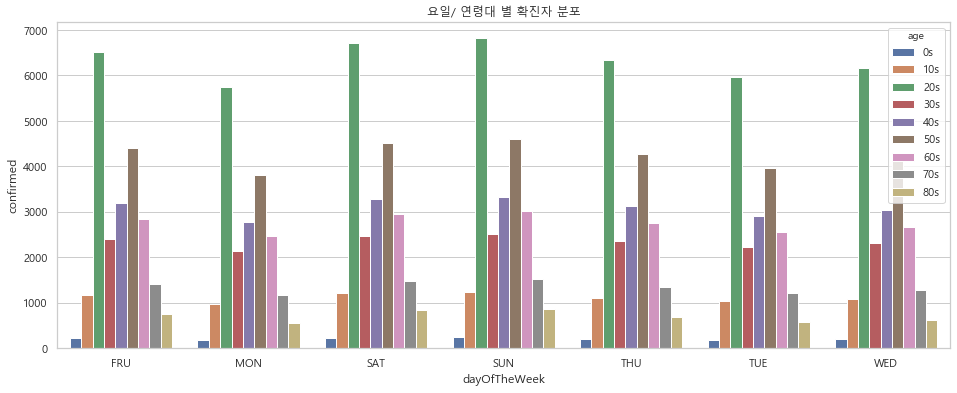

In [575]:
font_refresh()

day_data2 = day_data2.reset_index()
plt.figure(figsize = (16,6))
sns.barplot(x="dayOfTheWeek", y="confirmed",hue="age", data=day_data2)
plt.title("요일/ 연령대 별 확진자 분포")
plt.show()


2020.04.05
TimeAge Data. SUMMARY 

1. Time_Age 데이터 에서 확진에 따른 사망률은 그려보면, 60대 이후로 급격하게 증가한다.
2. 매일 확진자를 체크했을때, 20대에서 가장 많이 나타난다. 

=> 그래프를 보면, 20,50대가 주요 확진자이며, 20대가 매일 나타나는 확진자가 가장 많다. 
=> 치사율이 높은 60대 이후의 고연령층 확진자에 대해서는 적극적인 care가 필요하며, 확진자가 많이 나타나는 20대, 50대가 많이 다니는 장소에 대한 주의가 요구된다. 

3. 예상과 달리, 요일별 확진자의 추이가 큰 변동이 없다. 
4. 연령대에 따라 요일별 확진자 추이 곡선은 매우 유사하다. 

=> 주말이나 근무일에 따라 코로나 질병 확진자는 변화하지 않는다. 시간때에 따라 파악해보는 것이 효과적일 것이라 생각된다.